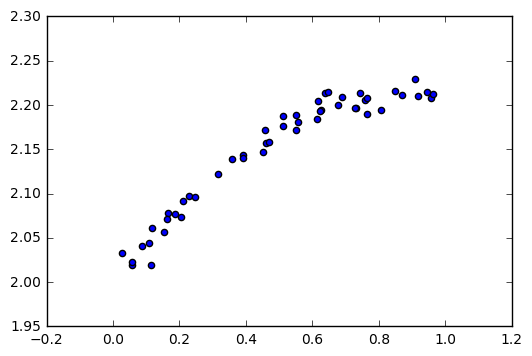

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# データを生成
n=50
x_data = np.random.rand(n).astype(np.float32)
y_data = 0.14* x_data**4  -  0.35* x_data**3  +  0.2 * x_data*2 + 0.01*x_data + 2

# 　ノイズを加える
y_data = y_data + 0.009 * np.random.randn(n) 

# ノイズ付きデータを描画
plt.scatter(x_data,y_data)
plt.show()


Step: 000,   Loss: 231.2668
Step: 1000,   Loss: 36.0228
Step: 2000,   Loss: 12.9340
Step: 3000,   Loss: 3.0216
Step: 4000,   Loss: 0.5841
Step: 5000,   Loss: 0.2712
Step: 6000,   Loss: 0.1423
Step: 7000,   Loss: 0.0518
Step: 8000,   Loss: 0.0128
Step: 9000,   Loss: 0.0051
Step: 10000,   Loss: 0.0047
Step: 11000,   Loss: 0.0047
Step: 12000,   Loss: 0.0047
0.029114x**4 + -0.130246x**3 + -0.119659x**2 + 0.426029x + 2.002106


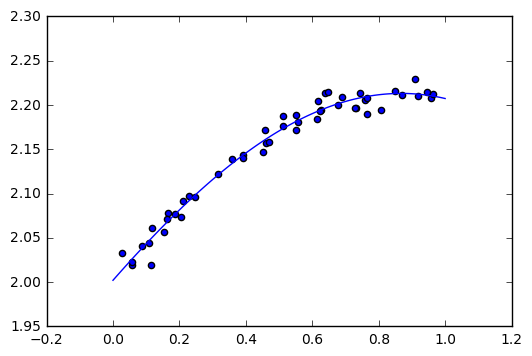

In [7]:
import tensorflow as tf

# モデル
xt = tf.placeholder(tf.float32, [None,5])
yt = tf.placeholder(tf.float32, [None,1])
w = tf.Variable(tf.zeros([5,1]))
y = tf.matmul(xt,w)

# 誤差関数
loss = tf.reduce_sum(tf.square(y-yt))
train = tf.train.AdamOptimizer().minimize(loss)

# TF初期化
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 先に作ったデータをトレーニング・データとして準備
y_train = y_data.reshape([n,1])
x_train = np.zeros([n,5])
for i in range(0,n):
    for j in range(0,5):
        x_train[i][j] = x_data[i]**j

#  トレーニング
for step in range(12001):
    if step % 1000 == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train, yt:y_train}) 
        print('Step: %03d,   Loss: %5.4f' % (step,loss_val))   
        w_val = sess.run(w)
    sess.run(train, feed_dict={xt:x_train,yt:y_train})

print('%fx**4 + %fx**3 + %fx**2 + %fx + %f' % (w_val[4],w_val[3],w_val[2],w_val[1],w_val[0]))


# 予測関数
def predict(x):
    result = 0.0
    for n in range(0,5):
        result += w_val[n][0] * x**n
    return result

# 描画
fig = plt.figure()
subplot = fig.add_subplot(1,1,1)
plt.scatter(x_data,y_data)
linex = np.linspace(0,1,100)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()
